In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt

In [2]:
fields = pd.read_csv('NSL_KDD-master/Field Names.csv',header=None)[0]
KDD = pd.read_csv('NSL_KDD-master/20 Percent Training Set.csv', header=None)
KDD.columns = fields
KDD

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


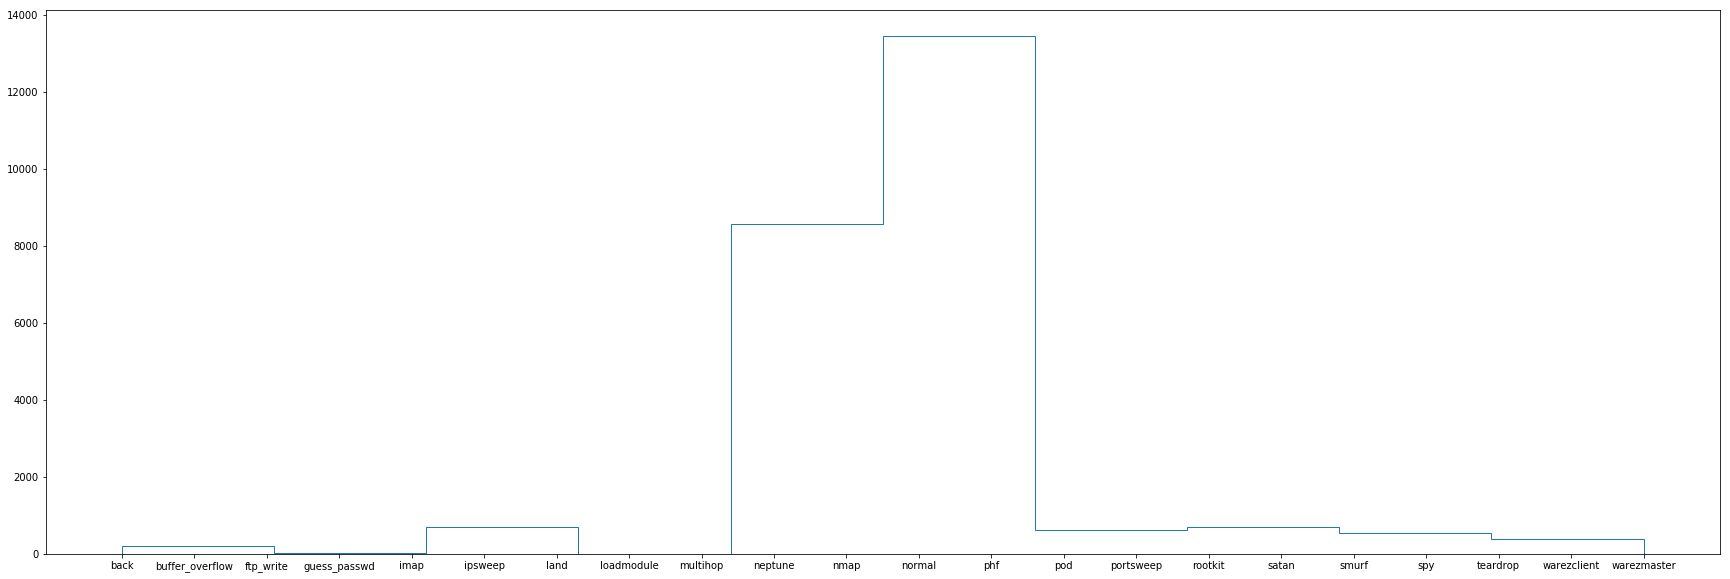

In [3]:
plt.figure(figsize=(30,10))
plt.hist(KDD['attack_type'], histtype='step')
plt.show()

In [15]:
KDD_clean = KDD
KDD_clean.protocol_type = pd.Categorical(pd.factorize(KDD.protocol_type)[0])
KDD_clean.service = pd.Categorical(pd.factorize(KDD.service)[0])
KDD_clean.flag = pd.Categorical(pd.factorize(KDD.flag)[0])
KDD_clean.attack_type = pd.Categorical(pd.factorize(KDD.attack_type)[0])

KDD_clean.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty
0,0,0,0,0,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,20
1,0,1,1,0,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,15
2,0,0,2,1,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,19
3,0,0,3,0,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,21
4,0,0,3,0,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,21


In [16]:
# Perceptron

from sklearn.linear_model import Perceptron

X_train = np.array(KDD.loc[:,:'dst_host_srv_rerror_rate'])
y_train = np.array(KDD['attack_type'])
p_clf = Perceptron(verbose=10)
p_clf.fit(X,y)

D:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


-- Epoch 1
Norm: 4255402.06, NNZs: 38, Bias: 948.000000, T: 25192, Avg. loss: 7673934506.513873
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 2207328.43, NNZs: 38, Bias: 1074.000000, T: 50384, Avg. loss: 8385700084.604066
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 286909947.28, NNZs: 39, Bias: 5212.000000, T: 75576, Avg. loss: 1268343514659.714844
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 133924940.76, NNZs: 39, Bias: 10652.000000, T: 100768, Avg. loss: 1288079288534.101074
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 6571435.00, NNZs: 39, Bias: 13062.000000, T: 125960, Avg. loss: 365720350419.284119
Total training time: 0.04 seconds.
-- Epoch 1
Norm: 7179.69, NNZs: 29, Bias: -186.000000, T: 25192, Avg. loss: 3547.825563
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 8720.46, NNZs: 29, Bias: -330.000000, T: 50384, Avg. loss: 3250.227200
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 10103.82, NNZs: 29, Bias: -459.000000, T: 75576, Avg. loss: 29

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


-- Epoch 1
Norm: 26778.84, NNZs: 28, Bias: -109.000000, T: 25192, Avg. loss: 681.456970
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 26853.33, NNZs: 28, Bias: -185.000000, T: 50384, Avg. loss: 501.058923
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 26966.15, NNZs: 28, Bias: -257.000000, T: 75576, Avg. loss: 465.395535
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 27077.28, NNZs: 28, Bias: -309.000000, T: 100768, Avg. loss: 431.254806
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 27196.08, NNZs: 28, Bias: -368.000000, T: 125960, Avg. loss: 368.378705
Total training time: 0.05 seconds.
-- Epoch 1
Norm: 6036.43, NNZs: 28, Bias: 59.000000, T: 25192, Avg. loss: 952.662620
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 24968.11, NNZs: 28, Bias: 146.000000, T: 50384, Avg. loss: 13286.113375
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 15136.88, NNZs: 28, Bias: 188.000000, T: 75576, Avg. loss: 8155.556393
Total training time: 0.02 seconds.
-- Epoch 4
Norm:

Norm: 2527.80, NNZs: 17, Bias: -1.000000, T: 50384, Avg. loss: 139.289664
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 986.69, NNZs: 15, Bias: 0.000000, T: 75576, Avg. loss: 192.709251
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1874.83, NNZs: 17, Bias: -1.000000, T: 100768, Avg. loss: 99.032161
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 7265.98, NNZs: 17, Bias: -1.000000, T: 125960, Avg. loss: 518.561174
Total training time: 0.05 seconds.
-- Epoch 1
Norm: 3118.62, NNZs: 21, Bias: -2.000000, T: 25192, Avg. loss: 110.426903
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 2426.39, NNZs: 21, Bias: -1.000000, T: 50384, Avg. loss: 93.783689
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1971.09, NNZs: 22, Bias: -1.000000, T: 75576, Avg. loss: 58.768282
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1775.58, NNZs: 22, Bias: -1.000000, T: 100768, Avg. loss: 68.135194
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1575.51, NNZs: 22, Bias: -1.000000, T

[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.8s finished


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=10, warm_start=False)

In [17]:
KDD_train = pd.read_csv('NSL_KDD-master/KDDTrain+_20Percent.txt', header=None)
KDD_train.columns = fields
KDD_train.protocol_type = pd.Categorical(pd.factorize(KDD_train.protocol_type)[0])
KDD_train.service = pd.Categorical(pd.factorize(KDD_train.service)[0])
KDD_train.flag = pd.Categorical(pd.factorize(KDD_train.flag)[0])
KDD_train.attack_type = pd.Categorical(pd.factorize(KDD_train.attack_type)[0])
KDD_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,difficulty
0,0,0,0,0,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,20
1,0,1,1,0,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,15
2,0,0,2,1,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,19
3,0,0,3,0,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,21
4,0,0,3,0,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,21


In [18]:
X_test = np.array(KDD_train.loc[:,:'dst_host_srv_rerror_rate'])
y_test = np.array(KDD_train['attack_type'])
p_clf.score(X,y)

0.21935535090504923

In [19]:
# Mulit-Layer Perceptron

from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier()
mlp_clf.fit(X_train, y_train)
mlp_clf.score(X_test, y_test)

0.9449825341378215

In [20]:
# Random Forest Classification

from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier()
rfc_clf.fit(X_train, y_train)
rfc_clf.score(X_test, y_test)

0.9998412194347411

In [22]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
gnb_clf.score(X_test, y_test)

0.4637980311209908

In [23]:
# Decision Tree

from sklearn import tree

dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.9999603048586853